Explore in more detail the results of the best Linear SVM classifier trained on features extracted from a pre-trained CNN.

Specifically, the best result came from VGG Net (https://gist.github.com/ksimonyan/fd8800eeb36e276cd6f9#file-readme-md), with features extracted from Fully Connected Layer 7.

In [45]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import caffe
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os, sys
import pickle
import sklearn.metrics as metrics
sys.path.append('../')
import helpers.histogram_classifier as hc
# set display defaults
plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from IPython.core.display import HTML
css = open('styles/table-style.css').read() #+ open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
sns.set_style('ticks')

In [6]:
classes = pd.read_csv('../data/food-101/meta/top_classes.csv', index_col=0)
class_list = list(classes['class'].unique())

In [7]:
predictions = np.load("../transfer-learning/models/svm_vggnet/svm_vggnet_layer_7_2016_08_17/predicted_labels")
actuals = np.load("../transfer-learning/models/svm_vggnet/svm_vggnet_layer_7_2016_08_17/test_labels")
predictions = np.array([x.decode() for x in predictions])
actuals = np.array([x.decode() for x in actuals])
score, metrics, confusion = hc.get_metrics(actuals, predictions, class_list)

In [8]:
score

Accuracy     F1  Precision  Recall
Results     0.685  0.684      0.684   0.685

In [9]:
metrics

Precision  Recall  F1-Score  Support
pork_chop            0.55    0.51      0.53    211.0
lasagna              0.67    0.61      0.64    187.0
french_toast         0.64    0.62      0.63    208.0
guacamole            0.90    0.89      0.90    189.0
apple_pie            0.55    0.60      0.57    194.0
cheesecake           0.70    0.67      0.68    206.0
hamburger            0.71    0.76      0.73    200.0
fried_rice           0.81    0.88      0.84    213.0
carrot_cake          0.66    0.65      0.66    205.0
chocolate_cake       0.70    0.76      0.73    178.0
steak                0.54    0.51      0.52    211.0
pizza                0.82    0.78      0.80    198.0

In [10]:
confusion

pork_chop  lasagna  french_toast  guacamole  apple_pie  \
pork_chop             108       16            11          0          5   
lasagna                10      114            10          1         12   
french_toast            9        3           129          4         18   
guacamole               0        0             0        169          4   
apple_pie               5        6            12          2        117   
cheesecake              3        3             8          0         15   
hamburger               4        3             9          3         10   
fried_rice              5        2             2          2          4   
carrot_cake             3        5             5          2         16   
chocolate_cake          0        2             2          1          5   
steak                  46        3            12          2          3   
pizza                   2       14             2          2          5   

                cheesecake  hamburger  fried_rice  carrot_cake  \
pork_chop                1          4           8            4   
lasagna                  3          5           5            4   
french_toast            14          7           1            5   
guacamole                0          6           5            1   
apple_pie               11         11           3           11   
cheesecake             137          2           2           14   
hamburger                4        151           0            4   
fried_rice               0          2         188            4   
carrot_cake             11          4           9          134   
chocolate_cake          11          3           0           16   
steak                    3         13           4            6   
pizza                    1          5           8            1   

                chocolate_cake  steak  pizza  
pork_chop                    3     49      2  
lasagna                      1      9     13  
french_toast                 6      7      5  
guacamole                    2      1      1  
apple_pie                    5      7      4  
cheesecake                  17      3      2  
hamburger                    4      7      1  
fried_rice                   0      2      2  
carrot_cake                 12      4      0  
chocolate_cake             135      3      0  
steak                        7    108      4  
pizza                        2      1    155

Look at confusion matrix as a heatmap:

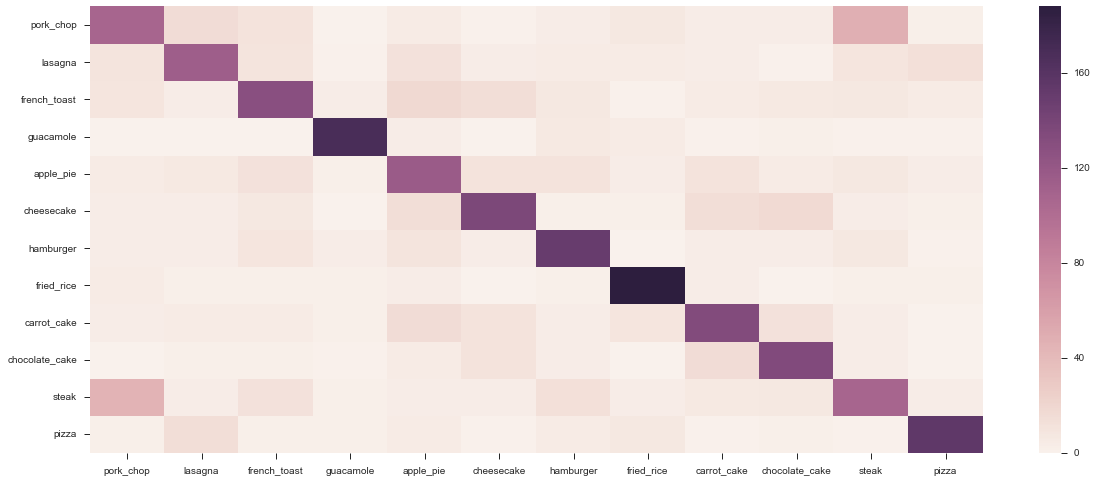

In [11]:
fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(confusion)
plt.show()

The most obvious fail cases are Steak & Pork chop being confused, and chocolate cake and cheesecake being confused
(slightly unsurprisingly)

In [12]:
labels = np.load("../transfer-learning/models/svm_vggnet/vggnet_test_images")
labels = np.array([x.decode() for x in labels])

In [13]:
# Group test image labels along with true and predicted class
test_images = []
for label, tru, predicted in zip(labels, actuals, predictions):
    d = {}
    d['label'] = label
    d['true_class'] = tru
    d['predicted_class'] = predicted
    test_images.append(d)

In [14]:
df = pd.DataFrame(test_images)

In [15]:
df.head(10)

label predicted_class    true_class
0   fried_rice/1941850.jpg      fried_rice    fried_rice
1   cheesecake/3834149.jpg      cheesecake    cheesecake
2    apple_pie/3897758.jpg       apple_pie     apple_pie
3        pizza/1655630.jpg           pizza         pizza
4    fried_rice/453052.jpg      fried_rice    fried_rice
5  french_toast/845721.jpg    french_toast  french_toast
6    cheesecake/621396.jpg      cheesecake    cheesecake
7    pork_chop/1059919.jpg       pork_chop     pork_chop
8        pizza/2035248.jpg           pizza         pizza
9   cheesecake/1639844.jpg      cheesecake    cheesecake

***Steaks predicted as Pork Chop:***

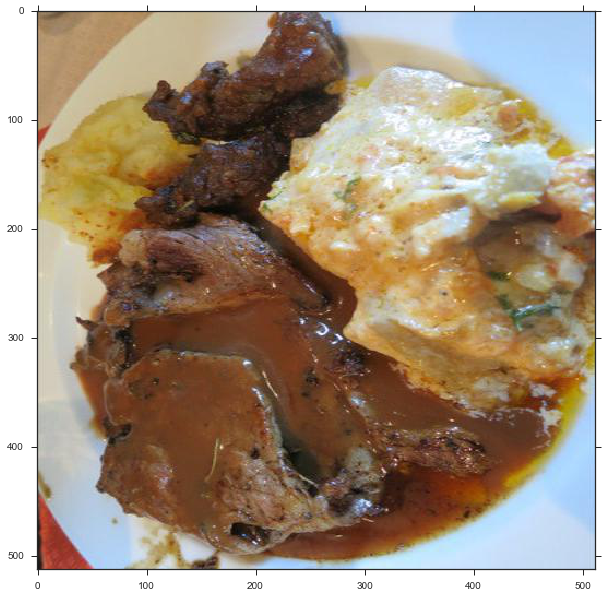

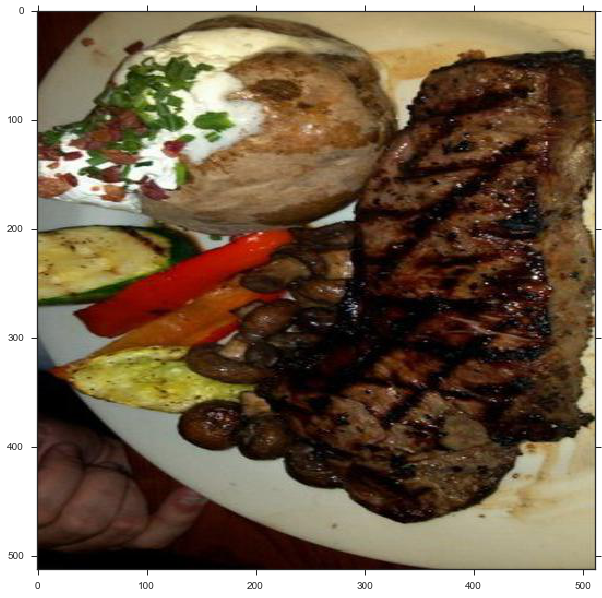

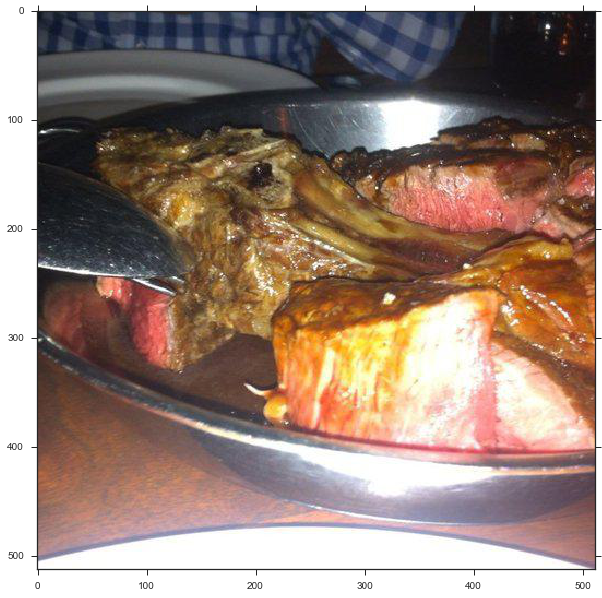

In [16]:
images = list(df[(df['predicted_class'] == 'pork_chop') & (df['true_class'] == 'steak')]['label'])
np.random.shuffle(images)
for im in images[:3]:
    image = caffe.io.load_image(os.path.join("../data/food-101/top_classes", im))
    plt.imshow(image)
    plt.show()

***Pork chop predicted as Steak:***

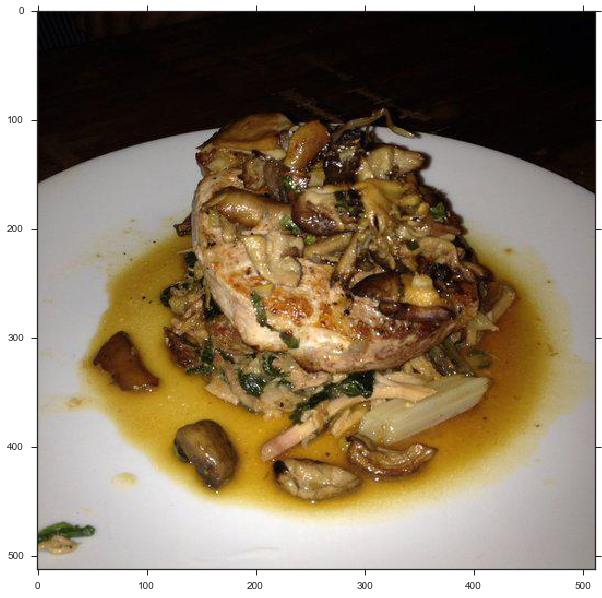

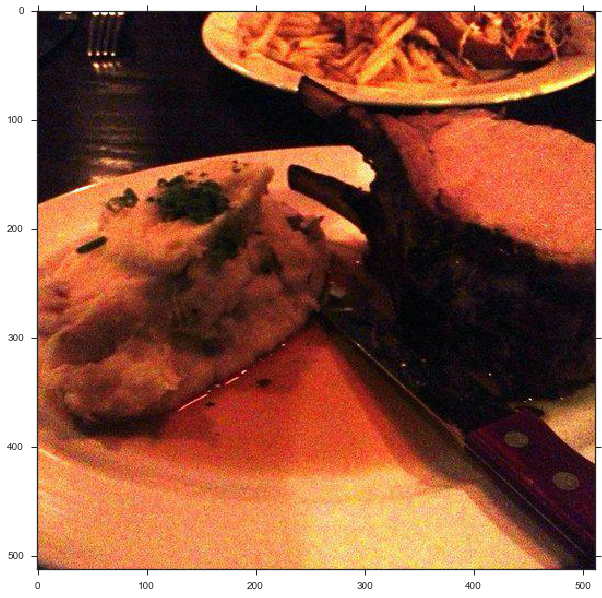

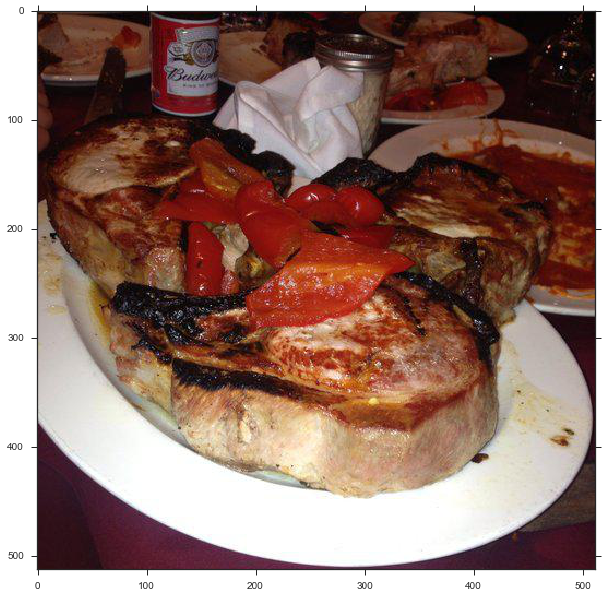

In [17]:
images = list(df[(df['predicted_class'] == 'steak') & (df['true_class'] == 'pork_chop')]['label'])
np.random.shuffle(images)
for im in images[:3]:
    image = caffe.io.load_image(os.path.join("../data/food-101/top_classes", im))
    plt.imshow(image)
    plt.show()

***Cheesecake predicted as chocolate cake:***

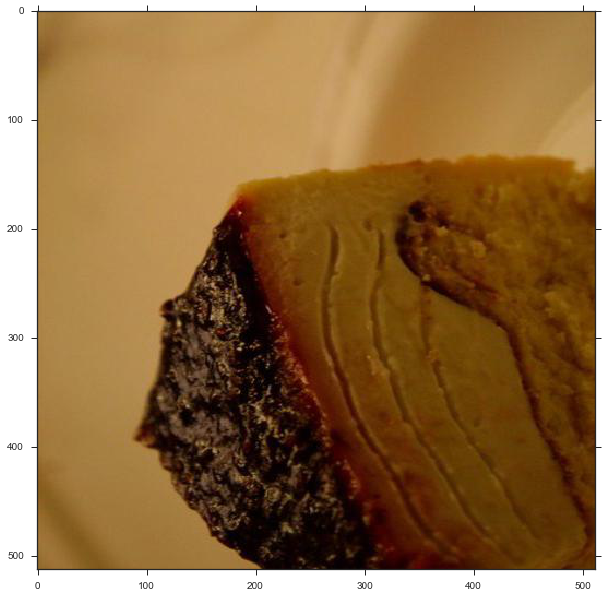

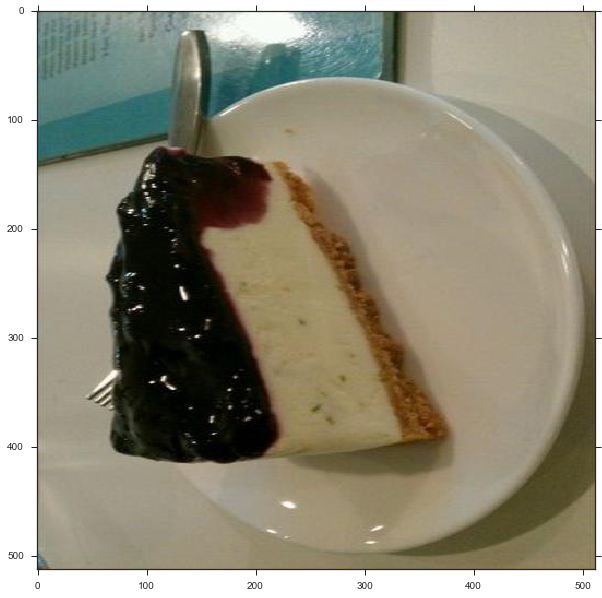

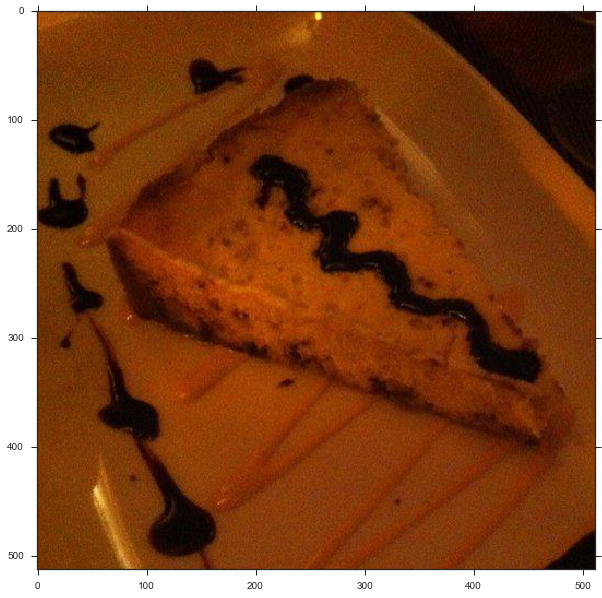

In [18]:
images = list(df[(df['predicted_class'] == 'chocolate_cake') & (df['true_class'] == 'cheesecake')]['label'])
np.random.shuffle(images)
for im in images[:3]:
    image = caffe.io.load_image(os.path.join("../data/food-101/top_classes", im))
    plt.imshow(image)
    plt.show()

***Chocolate cake predicted as cheesecake:***

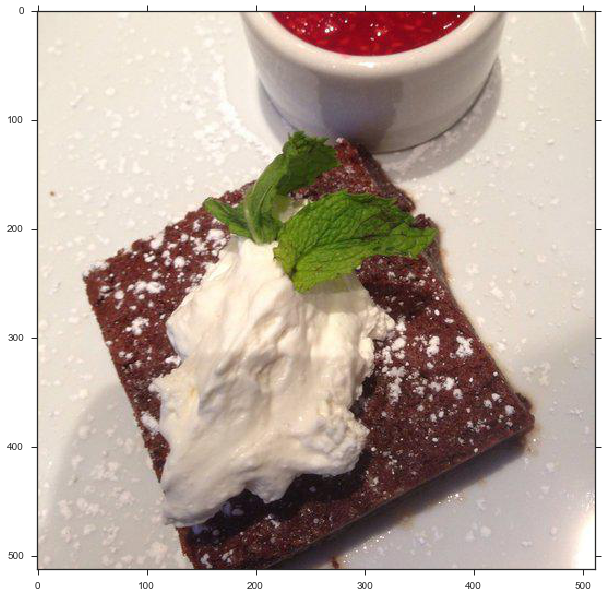

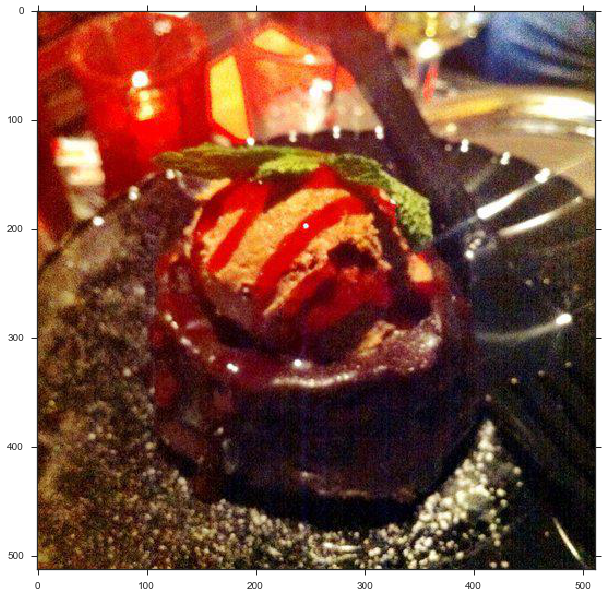

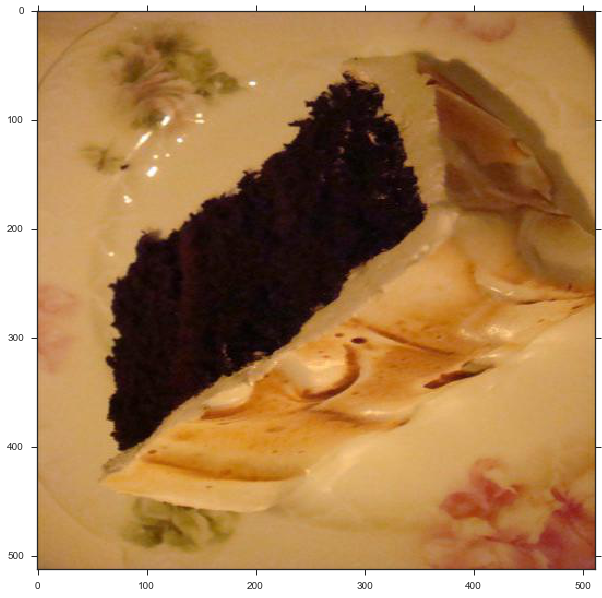

In [19]:
images = list(df[(df['predicted_class'] == 'cheesecake') & (df['true_class'] == 'chocolate_cake')]['label'])
np.random.shuffle(images)
for im in images[:3]:
    image = caffe.io.load_image(os.path.join("../data/food-101/top_classes", im))
    plt.imshow(image)
    plt.show()

To be able to look at Precision-Recall curves for each class, we need predicted probabilities.

The LinearSVC implementation trained on the features does not have a predict_proba method, so we will re-train a SVC with kernel 'linear' using the optimized C value in order to obtain class probabilities

In [20]:
#Load in the saved Linear SVC model
import pickle

with open("../transfer-learning/models/svm_vggnet/svm_vggnet_layer_7_2016_08_17/model.pkl", 'rb') as f:
    clf = pickle.load(f, encoding='latin1') 

In [21]:
from sklearn.svm import SVC

In [22]:
#Get training features and labels
X_train = np.load("../transfer-learning/models/svm_vggnet/svm_vggnet_layer_7_2016_08_17/train_data", encoding='latin1')
X_test = np.load("../transfer-learning/models/svm_vggnet/svm_vggnet_layer_7_2016_08_17/test_data", encoding='latin1')
y_train = np.load("../transfer-learning/models/svm_vggnet/svm_vggnet_layer_7_2016_08_17/train_labels")
y_test = np.load("../transfer-learning/models/svm_vggnet/svm_vggnet_layer_7_2016_08_17/test_labels")

y_train = np.array([x.decode() for x in y_train])
y_test = np.array([x.decode() for x in y_test])

In [23]:
svc = SVC(C=clf.C, kernel='linear', probability=True)

In [24]:
svc.fit(X_train, y_train)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
predictions = svc.predict(X_test)

In [26]:
#Check that the accuracy and F1 are more or less the same as the results obtained using the LinearSVC
metrics, _, _ = hc.get_metrics(y_test, predictions, class_list)
metrics

Accuracy     F1  Precision  Recall
Results     0.677  0.677      0.678   0.677

In [27]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [28]:
y_probs = svc.predict_proba(X_test)

In [29]:
precision = dict()
recall = dict()
average_precision = dict()
for i, c in enumerate(svc.classes_):
    t = (y_test == c).astype(int)
    s = y_probs[:, i]
    precision[c], recall[c], _ = precision_recall_curve(t, s)
    average_precision[c] = average_precision_score(t, s)

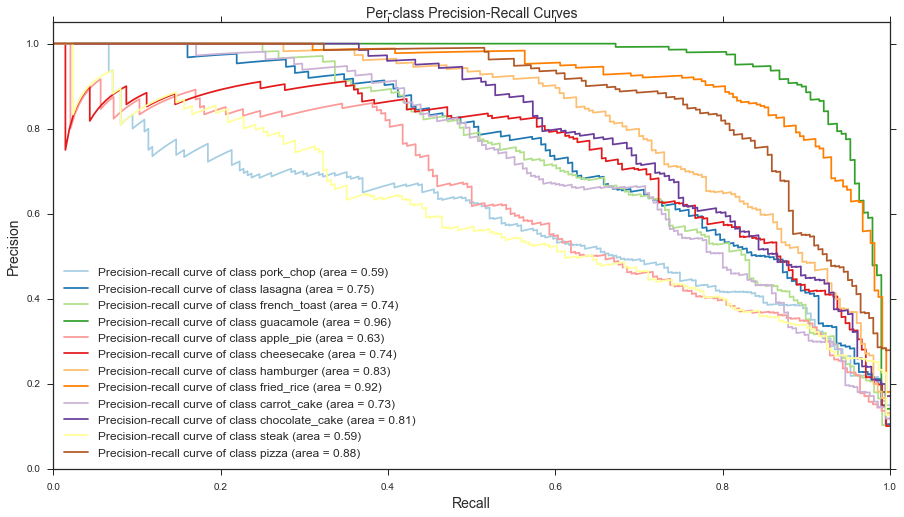

In [30]:
# Plot Precision-Recall curve for each class
colors = ('#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928')
fig, ax = plt.subplots(figsize=(15,8))
ax.set_axis_bgcolor('white')
for cl, co in zip(class_list, colors):
    plt.plot(recall[cl], precision[cl], color=co,
             label='Precision-recall curve of class {} (area = {:.2f})'.format(cl, average_precision[cl]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.title('Per-class Precision-Recall Curves', size=14)
plt.legend(loc="lower left", prop={'size':12})
plt.show()

Finally, look at the accuracy score for top 2 classes:

In [51]:
hc.top_n_class_accuracy(y_probs, svc.classes_, y_test, 2)

0.8475